# Object detection: OpenVINO Model Zoo

In this notebook, we will use the OpenVINO Model Zoo model we have just downloaded in [02-object-detection-openvino-model-zoo](../02-object-detection-openvino-model-zoo.md) to perform object detection using the OpenVINO Inference Engine.

## Import libraries

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

from pathlib import Path
import sys

Define the path to the model IR files

In [6]:
model_xml_path = "resources/models/person-vehicle-bike-detection-crossroad-1016.xml"
model_bin_path = "resources/models/person-vehicle-bike-detection-crossroad-1016.bin"

## Initialize the OpenVINO inference engine

Initialize an instance of the OpenVINO Inference Engine Core and then prints out the available devices that can be used for inference.

In [14]:
ie = Core()
print(ie.available_devices)

['CPU', 'GNA', 'GPU', 'MYRIAD']


Define the device to use for inference. Then, read the model IR files. Compile the model for the specified device, and then sets the input and output layers.

In [8]:
device = "MYRIAD"
model = ie.read_model(model=model_xml_path)
compiled_model = ie.compile_model(model=model, device_name=device)

input_layer_ir = compiled_model.input(0)
output_layer_ir = compiled_model.output(0)

Read the image and pre-process it for inference.

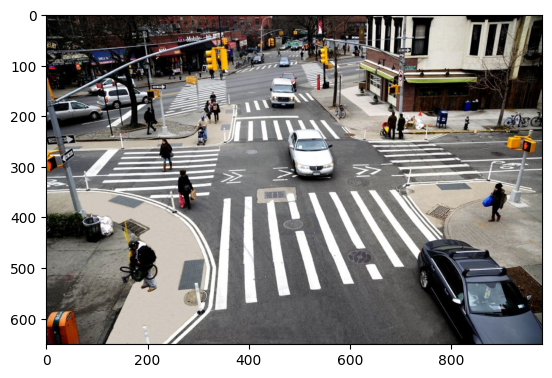

In [10]:
image = cv2.imread("resources/images/city_crosswalk.jpg")
#image = cv2.imread("person_walking.jpg")
N, C, H, W = input_layer_ir.shape
resized_image = cv2.resize(image, (W, H))
input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));


## Run inference

Run inference on the image and print out the model's prediction.

In [11]:
result = compiled_model.infer_new_request({0: input_image})
prediction = next(iter(result.values()))
print(prediction[0].shape)

(1, 200, 7)


Finally, we can draw the bounding boxes on the image and display it.

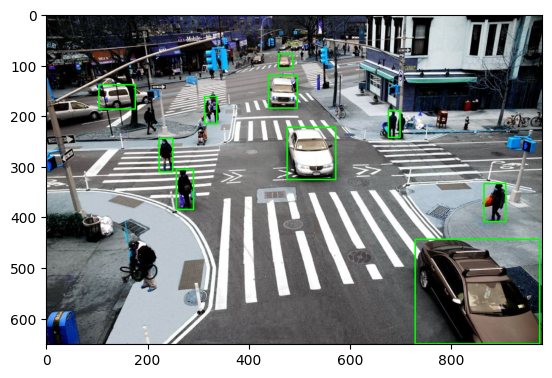

In [12]:
color = (0, 255, 0)  # Green
thickness = 2

for pred in prediction[0][0]:
    _, _, conf, x_min, y_min, x_max, y_max = pred
    x_min = int(x_min * image.shape[1])
    y_min = int(y_min * image.shape[0])
    x_max = int(x_max * image.shape[1])
    y_max = int(y_max * image.shape[0])
    if (conf > 0.7):
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
    
plt.imshow(image)

-----
### Exercise
1. Execute the (video_object_detection.py)[video_object_detection.py] script to perform object detection on a video file.
2. Modify the script to perform object detection on a webcam stream.
3. Modify the script to perform object detection on other devices.
4. Modify the script to perform object detection on other models.